# FINAL PROJECT: Part 2 – Cluster Analysis 


###  Table of Contents:

#### 1. Import libraries and files


#### 2. Data Cleaning and Preparation 
   - Drop columns that will not be used
   - Change data types as necessary
   - Check and correct missing values
   - Check and correct duplicates
   - Check and correct outliers

#### 3. Begin Cluster Analysis
   - Use elbow technique to determine optimal number of clusters
   - Run the k-means algorithm
   - Add the cluster information to the data
    
#### 4. Explore and investigate the clustered data
   - Generate scatter plots of pairs of data that are of interest 
   - Calculate the descriptive statistics for your clusters
   -  Observe results and extract for use in Excel and Tableau. 


### 1. Import libraries and files

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [33]:
# Paths to/from project folder

path_orig = r'C:\Users\kacor\CareerFoundry-Python\FINAL PROJECT\Project - Advanced Analytics & Dashboard Design\02 Data\Original Data'
path_prep = r'C:\Users\kacor\CareerFoundry-Python\FINAL PROJECT\Project - Advanced Analytics & Dashboard Design\02 Data\Prepared Data'
path_vis = r'C:\Users\kacor\CareerFoundry-Python\FINAL PROJECT\Project - Advanced Analytics & Dashboard Design\04 Analysis\Visualizations'

In [34]:
# Read in data

mls_cln = pd.read_csv(os.path.join(path_prep, 'CRMLS_cln.csv'), index_col=False)
mls_cln_std = pd.read_csv(os.path.join(path_prep, 'CRMLS_cln_std.csv'), index_col=False)

In [35]:
mls_cln.head()

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income,price_per_sqft
0,Los Angeles,Los Angeles,3,2.0,1575,63,8167,0,Y,N,2.5,1500000.0,3862210,71505.72,952.380952
1,Los Angeles,Los Angeles,3,2.0,2046,74,6328,1,Y,N,2.5,2300000.0,3862210,71505.72,1124.144673
2,Los Angeles,Los Angeles,3,2.0,1438,92,6748,1,Y,N,2.5,833000.0,3862210,71505.72,579.276773
3,Los Angeles,Los Angeles,3,2.0,1956,95,3051,10,Y,N,2.5,1897220.0,3862210,71505.72,969.948875
4,Los Angeles,Los Angeles,3,2.0,1350,71,10261,10,Y,N,2.5,1846000.0,3862210,71505.72,1367.407407


In [36]:
mls_cln.shape

(49626, 15)

In [37]:
mls_cln_std.head()

,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,commission,sale_price,population,median_family_income,price_per_sqft,county_Orange,county_Riverside,county_San Bernardino,view_Y,pool_Y
0,-0.486054,-0.516744,-0.440959,0.538168,-0.137610,-0.881882,0.622983,0.766132,3.556376,-0.73434,1.646983,-0.457105,-0.651489,-0.458458,0.839125,-0.452265
1,-0.486054,-0.516744,0.130112,0.939514,-0.353524,-0.858425,0.622983,1.864362,3.556376,-0.73434,2.267565,-0.457105,-0.651489,-0.458458,0.839125,-0.452265
2,-0.486054,-0.516744,-0.607066,1.596261,-0.304213,-0.858425,0.622983,-0.149516,3.556376,-0.73434,0.298959,-0.457105,-0.651489,-0.458458,0.839125,-0.452265
3,-0.486054,-0.516744,0.020990,1.705719,-0.738272,-0.647308,0.622983,1.311431,3.556376,-0.73434,1.710456,-0.457105,-0.651489,-0.458458,0.839125,-0.452265
4,-0.486054,-0.516744,-0.713763,0.830056,0.108243,-0.647308,0.622983,1.241117,3.556376,-0.73434,3.146472,-0.457105,-0.651489,-0.458458,0.839125,-0.452265


In [38]:
mls_cln_std.shape

(49626, 16)

In [39]:
mls_cln_std.columns

Index(['bedroom', 'bathrooms', 'property_sqft', 'property_age', 'lot_sqft',
       'dom', 'commission', 'sale_price', 'population', 'median_family_income',
       'price_per_sqft', 'county_Orange', 'county_Riverside',
       'county_San Bernardino', 'view_Y', 'pool_Y'],
      dtype='object')

### Data cleaning and preparation Drop categorical columns

In [40]:
# Drop categorical columns from standardized df

mls_cln_std.drop(columns = ['county_Orange', 'county_Riverside',
                           'county_San Bernardino', 'view_Y', 'pool_Y'], inplace=True)

In [41]:
mls_cln.shape

(49626, 15)

In [42]:
mls_cln_std.shape

(49626, 11)

In [43]:
mls_cln.describe()

,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,commission,sale_price,population,median_family_income,price_per_sqft
count,49626.000000,49626.000000,49626.000000,49626.000000,49626.000000,49626.000000,49626.000000,4.962600e+04,4.962600e+04,49626.000000,49626.000000
mean,3.434651,2.498287,1938.687825,48.250010,9339.065490,37.595051,2.289768,9.419145e+05,3.843443e+05,95475.238789,496.531171
std,0.894253,0.964293,824.774444,27.408065,8517.363005,42.630884,0.337464,7.284524e+05,9.779338e+05,32641.233199,276.781440
min,0.000000,0.000000,322.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+04,2.080000e+02,30994.920000,5.599104
25%,3.000000,2.000000,1345.000000,25.000000,5687.250000,8.000000,2.000000,5.380000e+05,4.995300e+04,72132.720000,299.437639
50%,3.000000,2.000000,1756.000000,47.000000,7200.000000,22.000000,2.500000,7.250000e+05,8.588900e+04,85048.920000,434.872226
75%,4.000000,3.000000,2354.000000,68.000000,9148.000000,52.000000,2.500000,1.065000e+06,1.701700e+05,113564.880000,612.988813
max,7.000000,7.000000,5997.000000,148.000000,87120.000000,363.000000,6.000000,7.500000e+06,3.862210e+06,299970.000000,6625.000000


In [44]:
mls_cln_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49626 entries, 0 to 49625
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bedroom               49626 non-null  float64
 1   bathrooms             49626 non-null  float64
 2   property_sqft         49626 non-null  float64
 3   property_age          49626 non-null  float64
 4   lot_sqft              49626 non-null  float64
 5   dom                   49626 non-null  float64
 6   commission            49626 non-null  float64
 7   sale_price            49626 non-null  float64
 8   population            49626 non-null  float64
 9   median_family_income  49626 non-null  float64
 10  price_per_sqft        49626 non-null  float64
dtypes: float64(11)
memory usage: 4.2 MB


### Begin Cluster Analysis

#### Use the elbow technique to determine the number of clusters to use.

In [45]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [46]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(mls_cln_std).score(mls_cln_std) for i in range(len(kmeans))] 

score

[-545885.9999999998,
 -447430.8274105282,
 -392392.03674057324,
 -347913.21071011946,
 -322305.4305331949,
 -295861.4112304269,
 -276451.6109721249,
 -259811.83338032002,
 -246644.54189442823]

Text(0.5, 1.0, 'Elbow Curve')

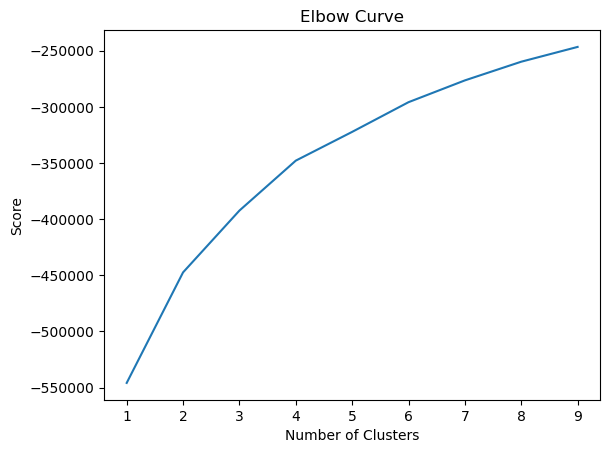

In [47]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

The elbow curve does not provide a well defined "elbow", it increases at a fairly consistaint rate through  most of the curve.  The curve does flatten a bit after cluster 5. I will choose 5 clusters because at this point, approximately 83% of the score has been acieved.

#### Run the k-means algorithm.

In [48]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [49]:
# Fit the k-means object to the data.

kmeans.fit(mls_cln_std)

C:\Users\kacor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

#### Attach a new column to your dataframe with the resulting clusters. This will allow the creation of visualizations using the clusters.

In [50]:
# Attach 'clusters' column to the standardized df

mls_cln_std['clusters'] = kmeans.fit_predict(mls_cln_std)
mls_cln_std.head(5)

C:\Users\kacor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,commission,sale_price,population,median_family_income,price_per_sqft,clusters
0,-0.486054,-0.516744,-0.440959,0.538168,-0.137610,-0.881882,0.622983,0.766132,3.556376,-0.73434,1.646983,3
1,-0.486054,-0.516744,0.130112,0.939514,-0.353524,-0.858425,0.622983,1.864362,3.556376,-0.73434,2.267565,3
2,-0.486054,-0.516744,-0.607066,1.596261,-0.304213,-0.858425,0.622983,-0.149516,3.556376,-0.73434,0.298959,3
3,-0.486054,-0.516744,0.020990,1.705719,-0.738272,-0.647308,0.622983,1.311431,3.556376,-0.73434,1.710456,3
4,-0.486054,-0.516744,-0.713763,0.830056,0.108243,-0.647308,0.622983,1.241117,3.556376,-0.73434,3.146472,3


In [51]:
mls_cln_std.clusters.value_counts()

0    24135
1    16779
2     3864
3     3342
4     1506
Name: clusters, dtype: int64

In [52]:
# Add the 'clusters' column to df that was not standardized

mls_cln['clusters'] = kmeans.fit_predict(mls_cln_std)
mls_cln.head(5)

C:\Users\kacor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income,price_per_sqft,clusters
0,Los Angeles,Los Angeles,3,2.0,1575,63,8167,0,Y,N,2.5,1500000.0,3862210,71505.72,952.380952,1
1,Los Angeles,Los Angeles,3,2.0,2046,74,6328,1,Y,N,2.5,2300000.0,3862210,71505.72,1124.144673,1
2,Los Angeles,Los Angeles,3,2.0,1438,92,6748,1,Y,N,2.5,833000.0,3862210,71505.72,579.276773,1
3,Los Angeles,Los Angeles,3,2.0,1956,95,3051,10,Y,N,2.5,1897220.0,3862210,71505.72,969.948875,1
4,Los Angeles,Los Angeles,3,2.0,1350,71,10261,10,Y,N,2.5,1846000.0,3862210,71505.72,1367.407407,1


In [53]:
mls_cln.clusters.value_counts()

3    24135
0    16779
4     3864
1     3342
2     1506
Name: clusters, dtype: int64

In [54]:
# Save df with clusters, cities and counties for use in Tableau

mls_cln.to_csv(os.path.join(path_prep, 'CRMLS_cln_clust_cnty2.csv'), index=False)

### 4. Explore and investigate the clustered data

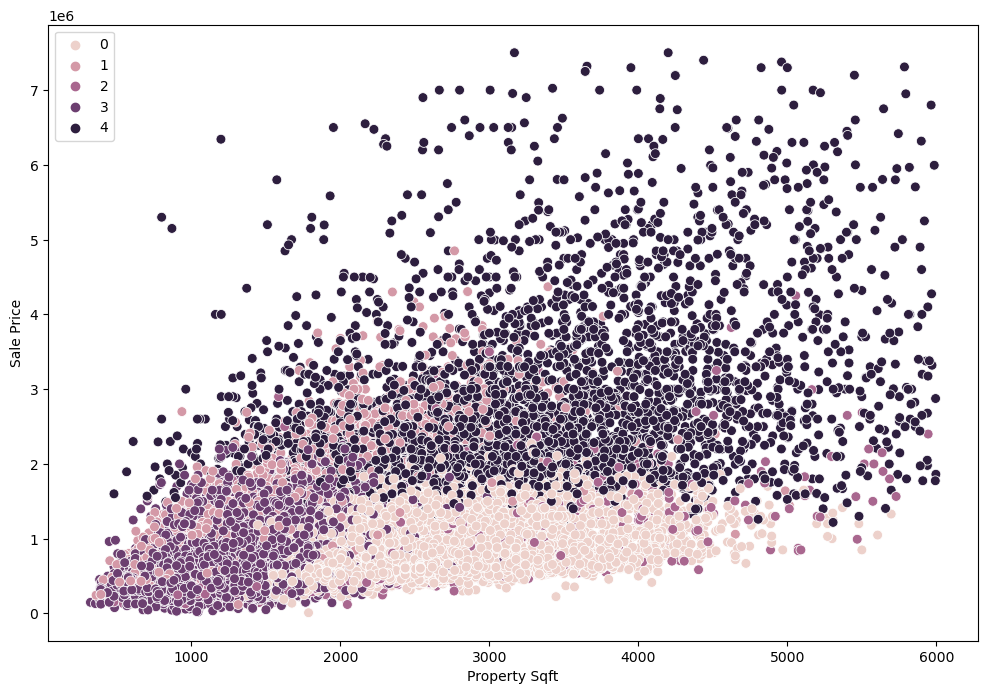

In [55]:
# Plot the clusters for the "Sale Price'" and "Property Sqft" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mls_cln['property_sqft'], y=mls_cln['sale_price'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Property Sqft') # Label x-axis.
plt.ylabel('Sale Price') # Label y-axis.
plt.show()

8a. This plot is difficult to interpret. I reduced the point size smaller which did help. It is apparent that smaller properties have lower sale prices while larger properties have higher sale prices.   

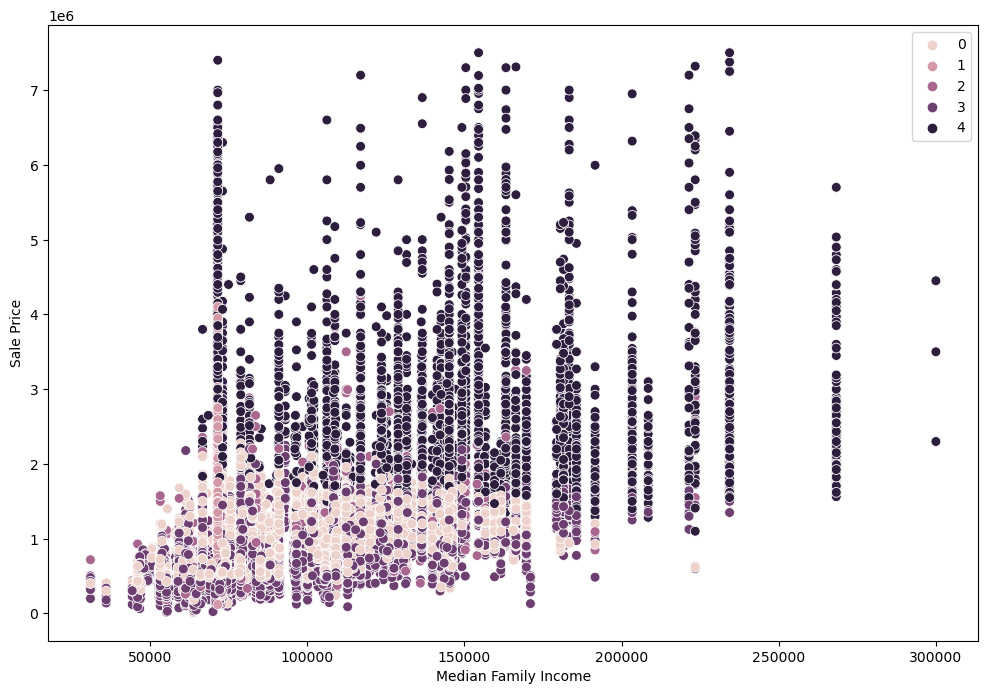

In [56]:
# Plot the clusters for the "Sale Price" and "Median Household Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mls_cln['median_family_income'], y=mls_cln['sale_price'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Family Income') # Label x-axis.
plt.ylabel('Sale Price') # Label y-axis.
plt.show()

8b. This plot shows that lower income areas have many more low priced homes and relatively few higher priced homes. And the range of those higher priced homes is limited. In higher income areas,the range of prices is much wider with lows near those of low income areas but with highes that are much higher. 

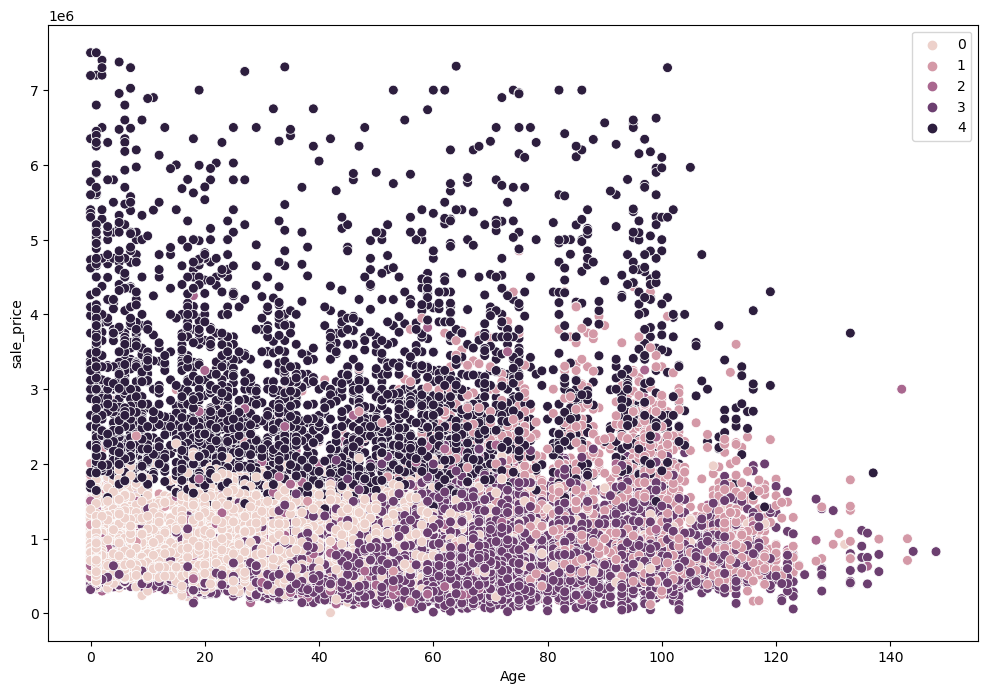

In [57]:
# Plot the clusters for the "Sale Price'" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mls_cln['property_age'], y=mls_cln['sale_price'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('sale_price') # Label y-axis.
plt.show()

8c. This plot shows that most of the lower priced homes are in the 30yr to well over 100yr age range. There is a mid-priced group of homes at age zero up to approx. 75 years old. Most of the higher priced homes are in an age range of zero years up to approx. 50 years old.

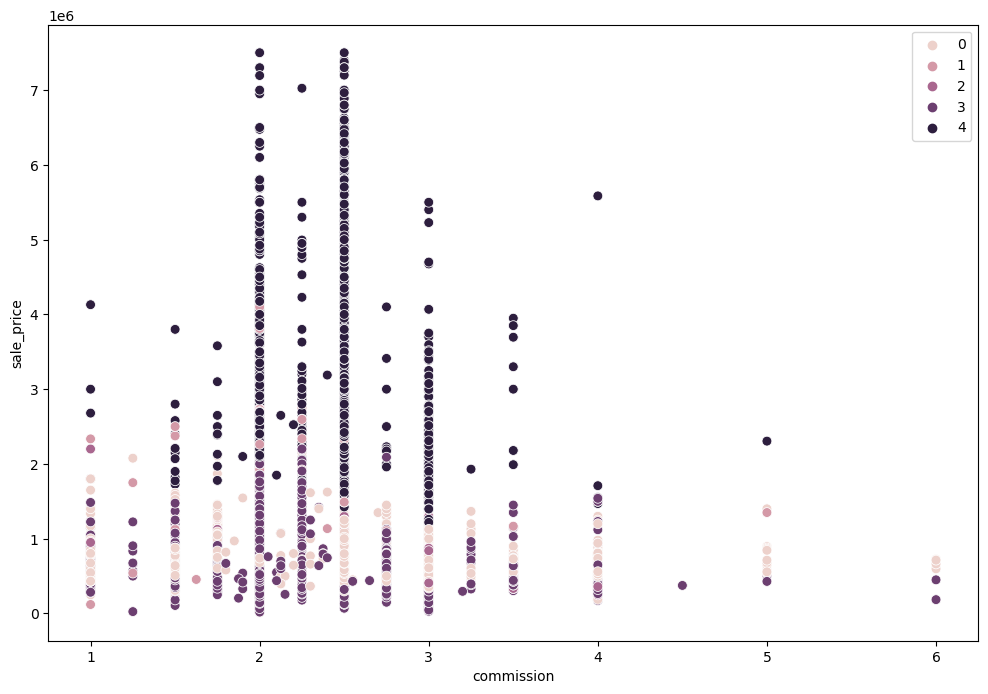

In [58]:
# Plot the clusters for the "Sale Price'" and "commission" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mls_cln['commission'], y=mls_cln['sale_price'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('commission') # Label x-axis.
plt.ylabel('sale_price') # Label y-axis.
plt.show()

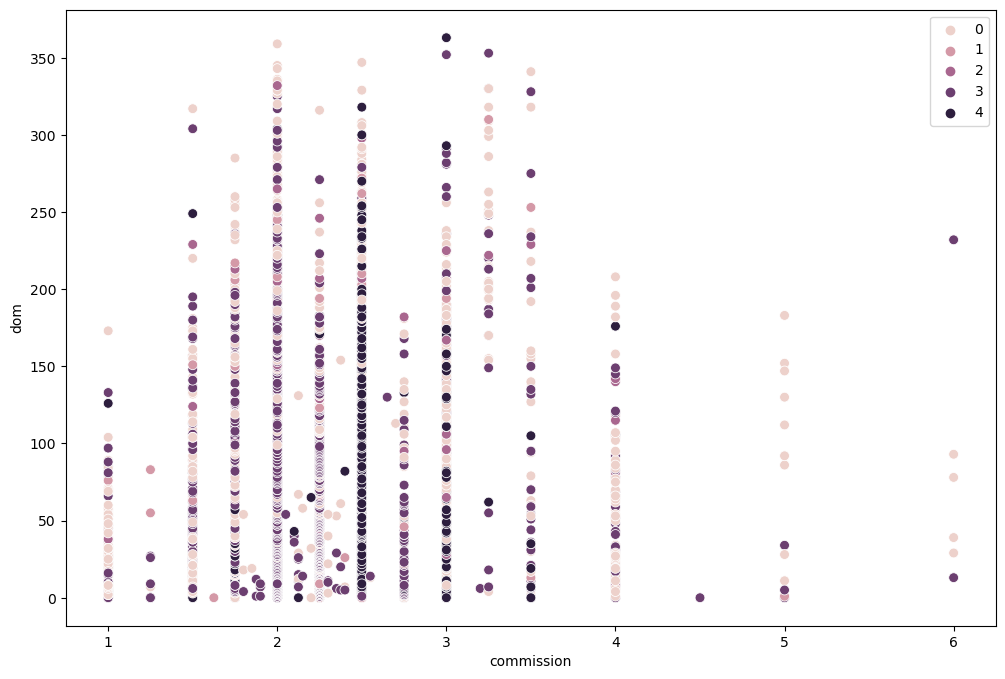

In [59]:


# Plot the clusters for the 'dom' and "commission" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=mls_cln['commission'], y=mls_cln['dom'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('commission') # Label x-axis.
plt.ylabel('dom') # Label y-axis.
plt.show()

Cluster analysis yielded five groups. The nature of the data makes this somewhat difficult to decipher. However, it is evident that cluster 4 (dark purple) may not have as many points at the higher levels of days on market as other clusters. This would imply that homes in this cluster sold more quickly 

In [60]:
# Allow all columns be be visible 

pd.set_option('display.max_columns', None)

#### Calculate the descriptive statistics for clustered data

In [61]:
mls_cln.groupby('clusters').agg({'sale_price':['mean', 'median'],
                         'price_per_sqft':['mean', 'median'],
                         'bedroom':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                         'property_sqft':['mean', 'median'],           
                         'property_age':['mean', 'median'],
                         'lot_sqft':['mean', 'median'],
                         'dom':['mean', 'median'],       
                         'commission':['mean', 'median'],   
                         'population':['mean', 'median'], 
                         'median_family_income':['mean', 'median']})

sale_price            price_per_sqft               bedroom         \
                  mean     median           mean      median      mean median   
clusters                                                                        
0         8.221946e+05   725000.0     345.426201  308.863026  4.025031    4.0   
1         1.285892e+06  1125000.0     786.165833  741.772887  3.029324    3.0   
2         7.400095e+05   583500.0     327.731199  285.205503  3.557769    4.0   
3         6.986541e+05   650000.0     506.107403  480.535280  2.957655    3.0   
4         2.762403e+06  2420000.0     908.156860  799.954160  4.152950    4.0   

         bathrooms        property_sqft         property_age         \
              mean median          mean  median         mean median   
clusters                                                              
0         3.042553    3.0   2428.584063  2330.0    27.660290   23.0   
1         2.203172    2.0   1638.042789  1508.0    84.172053   88.0   
2         2.653386    2.0   2253.949535  2083.0    40.314741   38.0   
3         1.906401    2.0   1407.095380  1395.0    58.973648   63.0   
4         4.026656    4.0   3268.912008  3182.0    42.701087   41.0   

              lot_sqft                 dom        commission         \
                  mean   median       mean median       mean median   
clusters                                                              
0          8477.300197   7405.0  45.962095   30.0   2.262674   2.00   
1          6249.789946   5750.0  34.014662   19.0   2.385331   2.50   
2         47025.881806  43560.0  47.173307   28.0   2.289509   2.25   
3          7612.684815   6970.0  31.533623   18.0   2.278615   2.25   
4         11847.805383   9109.0  38.486025   21.5   2.394533   2.50   

            population            median_family_income             
                  mean     median                 mean     median  
clusters                                                           
0         1.053702e+05    81658.0         96644.968082   90225.96  
1         3.862210e+06  3862210.0         71505.720000   71505.72  
2         9.546966e+04    70561.0         84940.708048   72590.76  
3         1.233565e+05    86400.0         90151.517643   83711.76  
4         3.304788e+05    57251.0        148485.657298  145141.92

OBSERVATIONS

- The cluster analysis revealed a few insights:
- Clusters four and one have the second and third lowest average days on market of the five clusters.
- Clusters four and two have the two highest average prices per square foot of the five clusters. 
- This implies that there may be a relationship between commission paid, days on market, and also between commission paid and average price per square foot. 

In [62]:
# Copy to clipboard to export to Excel

mls_cln.groupby('clusters').agg({'sale_price':['mean', 'median'],
                         'price_per_sqft':['mean', 'median'],
                         'bedroom':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                         'property_sqft':['mean', 'median'],           
                         'property_age':['mean', 'median'],
                         'lot_sqft':['mean', 'median'],
                         'dom':['mean', 'median'],       
                         'commission':['mean', 'median'],   
                         'population':['mean', 'median'], 
                         'median_family_income':['mean', 'median']}).to_clipboard(excel=True)